In [1]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, AutoModelForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm

e:\Program Files\Anaconda\envs\cuda310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
dataset_path = # inseert here your dataset path
df_train = pd.read_csv(dataset_path+"train_data.csv")
df_val = pd.read_csv(dataset_path+"validation_data.csv")
df_test = pd.read_csv(dataset_path+"test_data.csv")

In [10]:
# Longitud de cada texto
df_train['Text_Length'] = df_train['Text'].apply(len)

# Media de la longitud de los textos
mean_length = df_train['Text_Length'].mean()

# Moda de la longitud de los textos
mode_length = df_train['Text_Length'].mode()[0]  # En caso de que haya múltiples modas, selecciona la primera

# Cuartiles de la longitud de los textos
quartiles = df_train['Text_Length'].quantile([0.25, 0.5, 0.75])

# Imprimir las métricas
print("Longitud media de los textos:", mean_length)
print("Moda de la longitud de los textos:", mode_length)
print("Cuartiles de la longitud de los textos:")
print(quartiles)

Longitud media de los textos: 83.42485646740965
Moda de la longitud de los textos: 70
Cuartiles de la longitud de los textos:
0.25     46.0
0.50     69.0
0.75    101.0
Name: Text_Length, dtype: float64


In [12]:
counts_train1 = df_train['Label_1'].value_counts().to_dict()
print("Distribución en training label1: ", counts_train1)
counts_val1 = df_val['Label_1'].value_counts().to_dict()
print("Distribución en validation label1: ", counts_val1)
counts_test1 = df_test['Label_1'].value_counts().to_dict()
print("Distribución en test label1: ", counts_test1)

counts_train2 = df_train['Label_2'].value_counts().to_dict()
print("Distribución en training label2: ", counts_train2)
counts_val2 = df_val['Label_2'].value_counts().to_dict()
print("Distribución en validation label2: ", counts_val2)
counts_test2 = df_test['Label_2'].value_counts().to_dict()
print("Distribución en test label2: ", counts_test2)

Distribución en training label1:  {'hate_speech': 1107, 'none': 991, 'inappropiate_content': 863}
Distribución en validation label1:  {'none': 205, 'inappropiate_content': 74, 'hate_speech': 60}
Distribución en test label1:  {'none': 209, 'inappropiate_content': 76, 'hate_speech': 55}
Distribución en training label2:  {'none': 991, 'inappropiate_content': 863, 'racism': 313, 'sexism': 311, 'other': 311, 'classism': 172}
Distribución en validation label2:  {'none': 205, 'inappropiate_content': 74, 'sexism': 24, 'racism': 18, 'other': 13, 'classism': 5}
Distribución en test label2:  {'none': 209, 'inappropiate_content': 76, 'sexism': 24, 'racism': 16, 'classism': 8, 'other': 7}


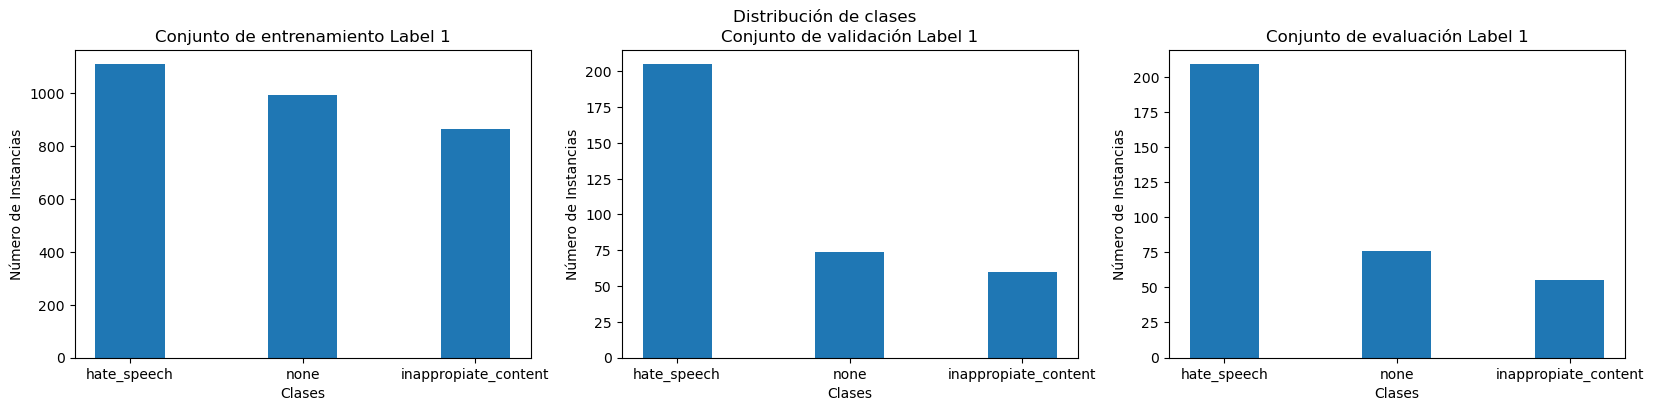

In [13]:
import matplotlib.pyplot as plt

# Definir etiquetas
LABELS = list(counts_train1.keys())  # Usamos las etiquetas del primer conjunto, podrías usar cualquier otro

fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Distribución de clases')

# Gráfico para conjunto de entrenamiento
ax_train.bar(LABELS, counts_train1.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento Label 1')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

# Gráfico para conjunto de validación
ax_val.bar(LABELS, counts_val1.values(), width=0.4)
ax_val.set_title('Conjunto de validación Label 1')
ax_val.set_xlabel('Clases')
ax_val.set_ylabel('Número de Instancias')

# Gráfico para conjunto de evaluación
ax_test.bar(LABELS, counts_test1.values(), width=0.4)
ax_test.set_title('Conjunto de evaluación Label 1')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

plt.show()


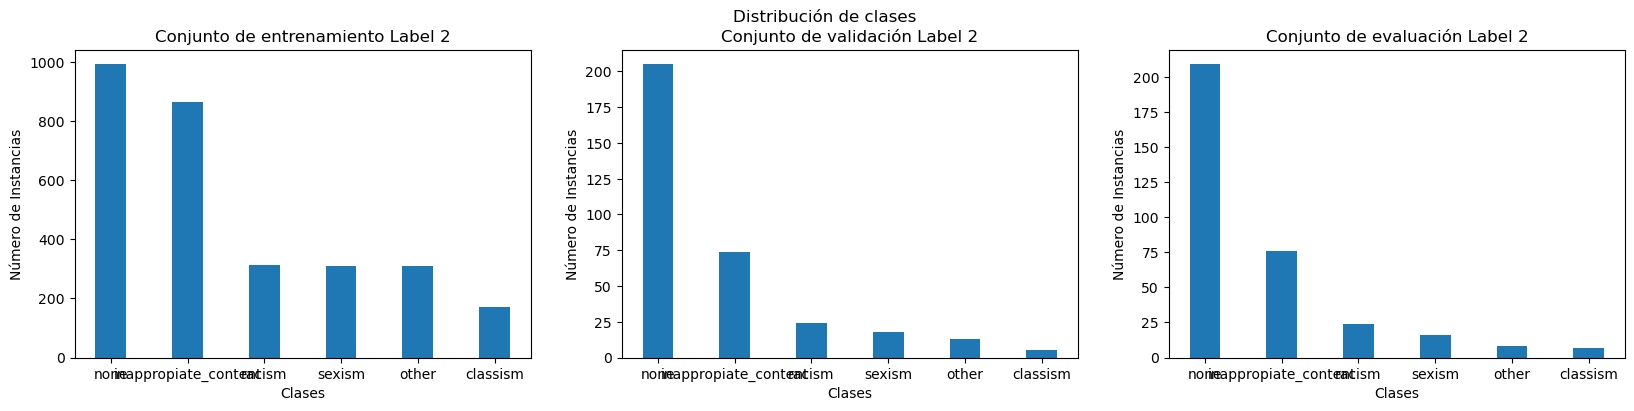

In [14]:
import matplotlib.pyplot as plt

# Definir etiquetas
LABELS = list(counts_train2.keys())  # Usamos las etiquetas del segundo conjunto

fig, (ax_train, ax_val, ax_test) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Distribución de clases')

# Gráfico para conjunto de entrenamiento
ax_train.bar(LABELS, counts_train2.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento Label 2')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

# Gráfico para conjunto de validación
ax_val.bar(LABELS, counts_val2.values(), width=0.4)
ax_val.set_title('Conjunto de validación Label 2')
ax_val.set_xlabel('Clases')
ax_val.set_ylabel('Número de Instancias')

# Gráfico para conjunto de evaluación
ax_test.bar(LABELS, counts_test2.values(), width=0.4)
ax_test.set_title('Conjunto de evaluación Label 2')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

plt.show()
